## By how many minutes will the last fan miss the kickoff if the number of fans exceed the expected value by 2000?

For this task we wont consider the ultras group. Since we scaled down the problem to 1 hour we will work with 1000 fans more than expected. We will work with 400 season ticket holders and 600 standard fans.

For employing the number of gates we worked with 3000 fans minus the ultra group of size 250
For task3 expect 3750 fans in total (no ultra group and 1000 more than initially thought)

In total: 2250 standard fans and 1500 season ticket holder fans

to employ this arrival numbers we had to change the lambda parameters for the poisson distrinution.

standard user spawn with a probability of poisson(1)
ticket user spawn with a probability of poisson(1.5)

The last fan arrives 13 minutes before kickoff. But as we can see there are still a lot of fans waiting at the security gate. We have 1417 fans stuck in the queue when the last fan spawns.

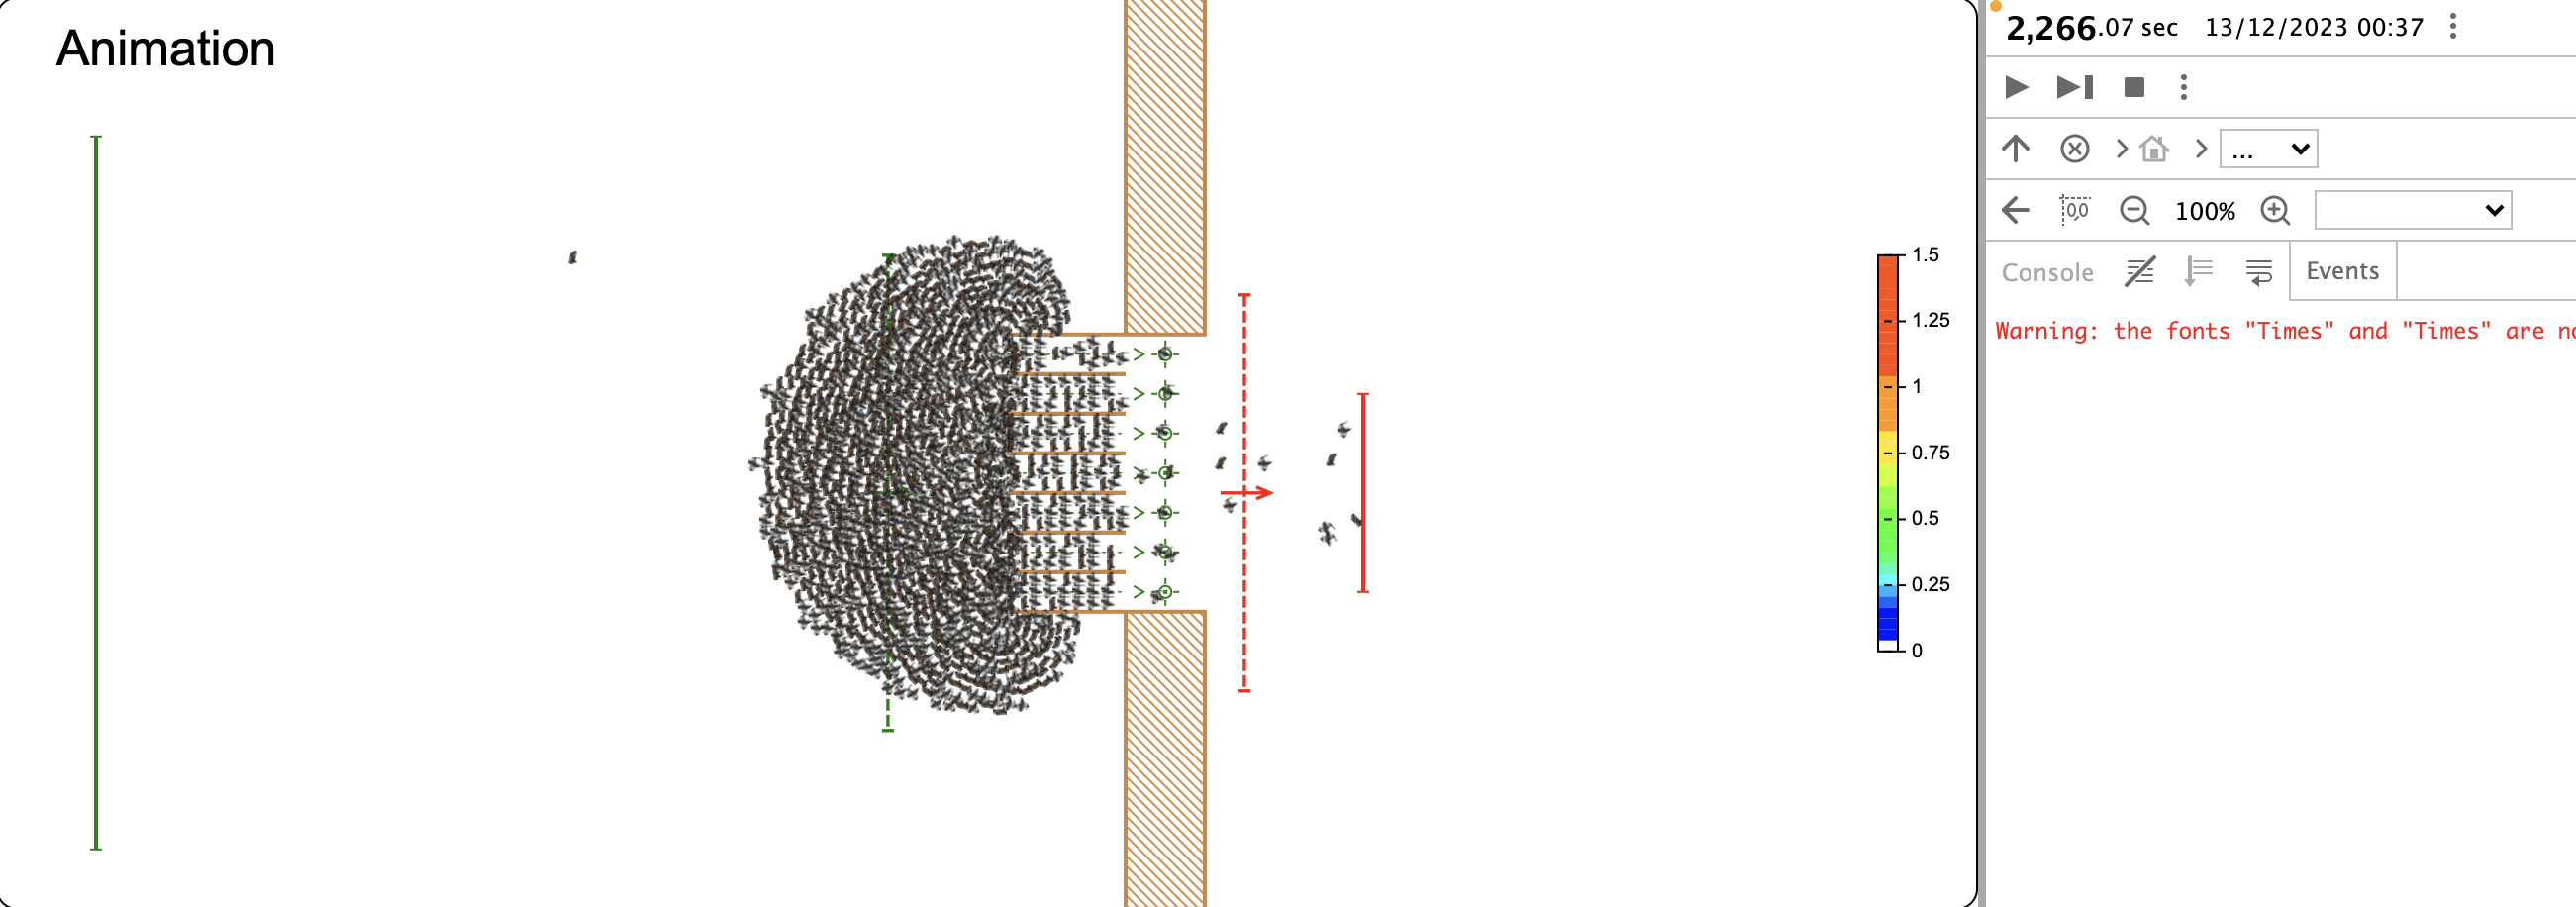

When the game starts we have 3118 soccer fans inside the stadium. So 83,15% of the arriving fans came into the stadium on time. 1967 standard fans and 1151 season ticket holders made it into the stadium. 283 standard fans and 349 season ticket holders are stuck in the security check.

After another 5 minutes of waiting, only 141 standard and 169 ticket fans are stuck at the securiyt check. 3440 fans are inside the stadium (91,73%).

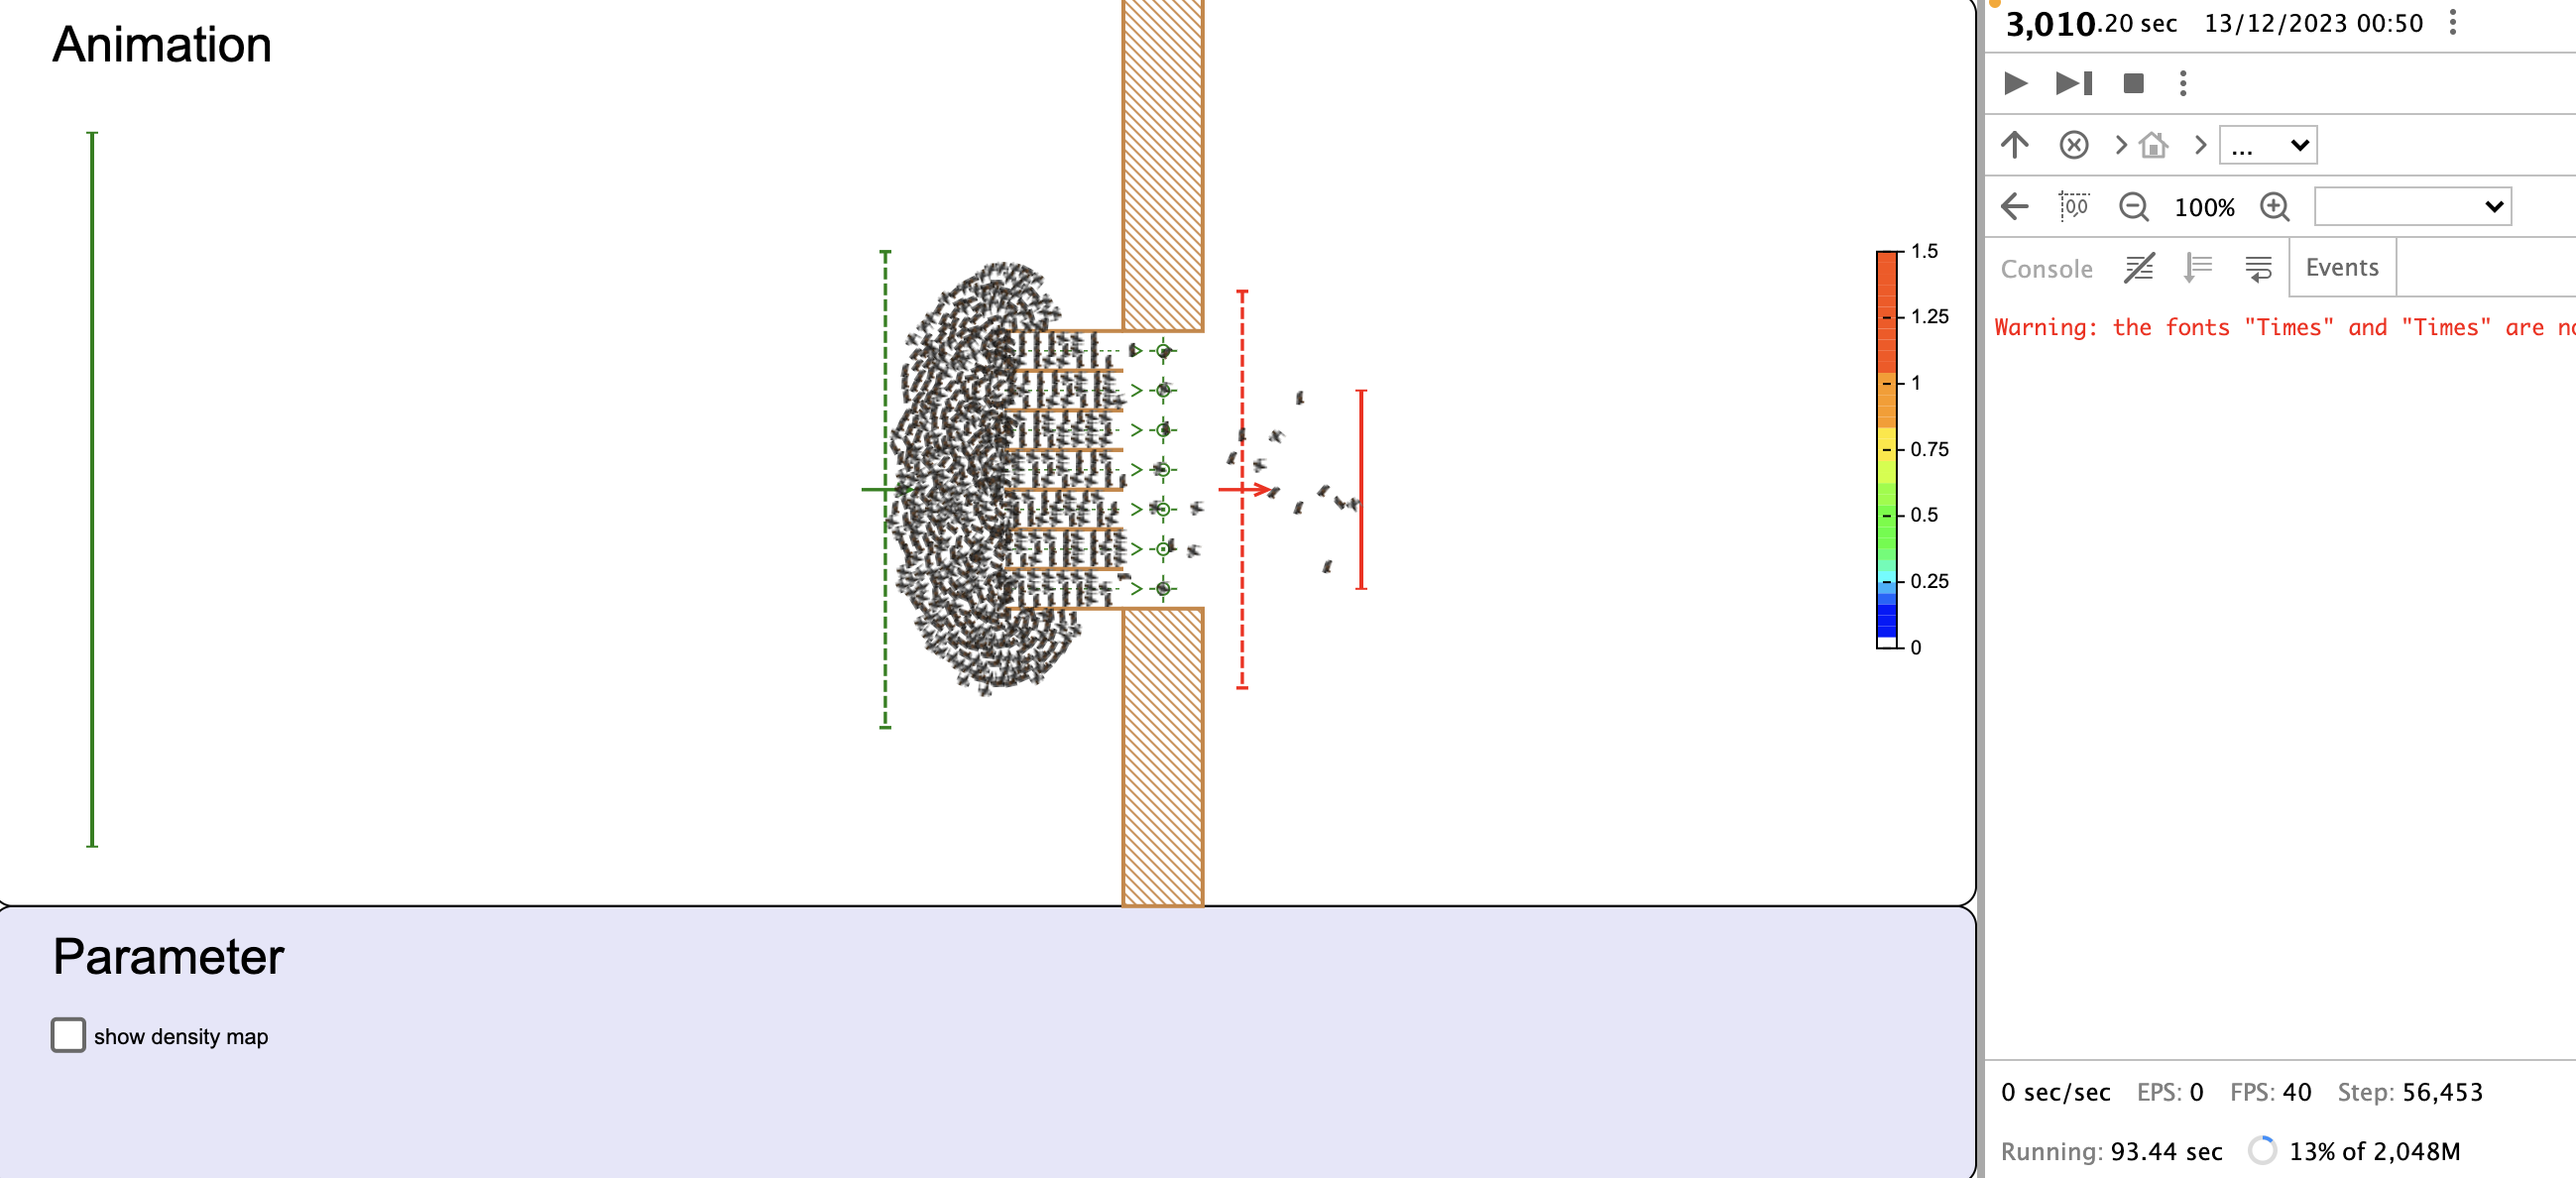

We see that some queues are more populated than others. Agents are trained to take the shortest queue nearly available, so when a closer queue is shorter the agent switches as long the fan is not in the lane, within the lane a switch is not possible anymore.

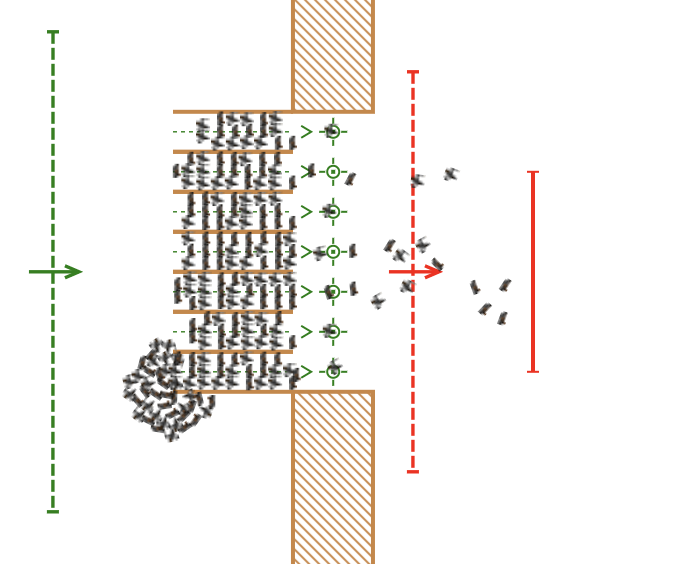

Unfortunately we are not able to simulate more than 1 hour. Therefore we are capped to a maximal waiting time of 10 minutes after kickoff we can observe. As we can see the the 39 left soccer fans are all stucked in one queue since they did not switch the queue when they decided to stick with one. We have 20 standard and 19 season ticket fans left in the queue.

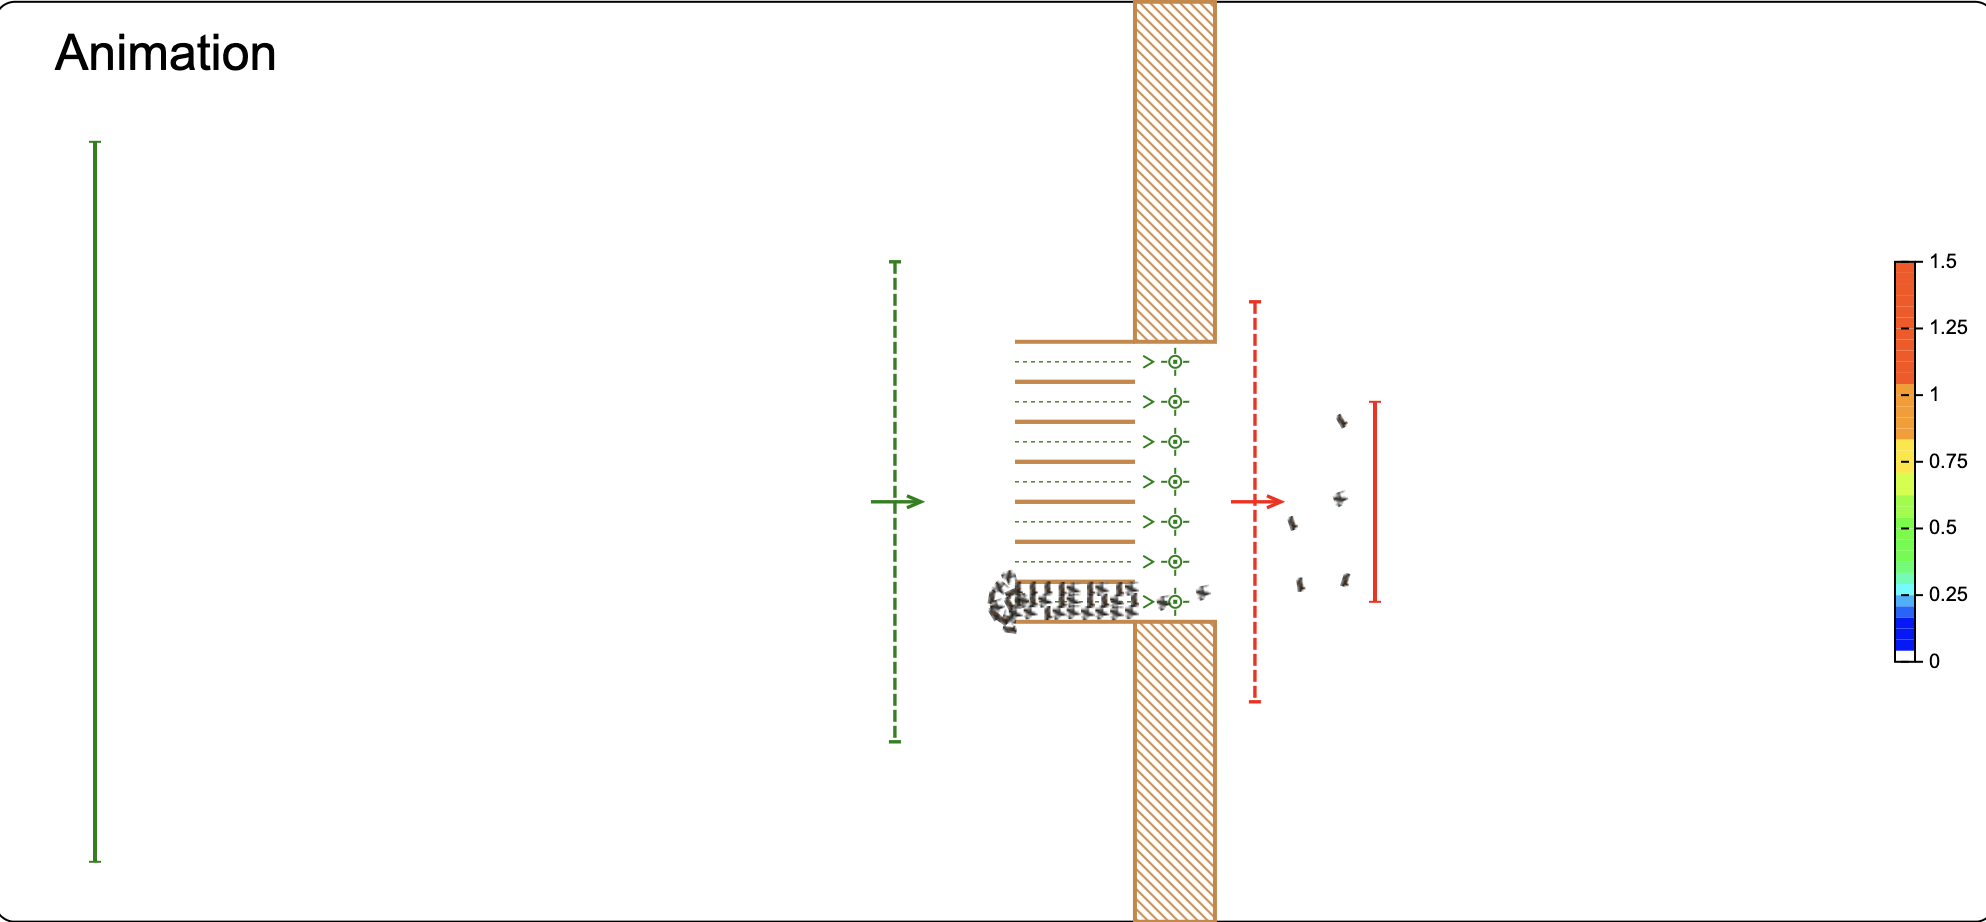

To awnser the question correctly we run this simulation multiple times and build a ditribution for the waiting times to be able to predict the minutes the last fan would wait.

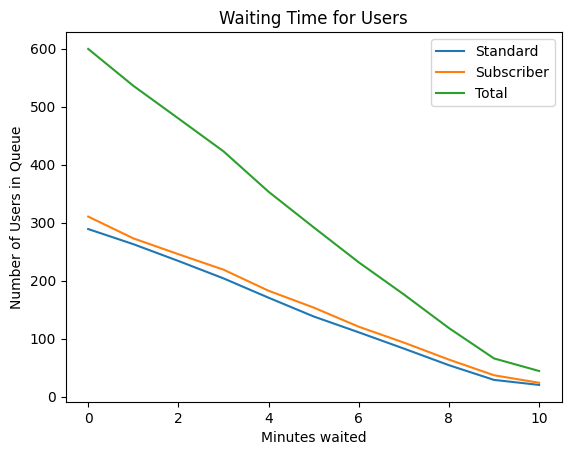

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("waiting_time.csv", sep=';')
df = df.groupby('Time').agg({'Standard':'mean', 'Subscriber':'mean'}).reset_index()
# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot the data
ax.plot(df['Time'], df['Standard'], label='Standard')
ax.plot(df['Time'], df['Subscriber'], label='Subscriber')
ax.plot(df['Time'], df['Subscriber'] + df['Standard'], label='Total')

# Set the title and labels
ax.set_title('Waiting Time for Users')
ax.set_xlabel('Minutes waited')
ax.set_ylabel('Number of Users in Queue')

# Add a legend
ax.legend()

# Show the plot
plt.show()

data seems to have a linear fit so we fit a linear model to the total number of customers

In [18]:
from sklearn.linear_model import LinearRegression
from scipy.interpolate import interp1d

df['Total'] = df['Standard'] + df['Subscriber']

model = LinearRegression()
model.fit(df['Time'].values.reshape(-1, 1), df['Total'])
# Predict values for the desired extrapolation range
extrapolation_range = np.arange(0, 16).reshape(-1, 1)
predicted = model.predict(extrapolation_range)

# Interpolate the function
f = interp1d(extrapolation_range.flatten(), predicted, kind='linear', fill_value="extrapolate")

# Find the root of the function
from scipy.optimize import fsolve
time_zero = fsolve(f, 0)

print(f'The total number is 0 at time {time_zero[0]}')

The total number is 0 at time 10.224632169739566


Based on the linear model the last soccer fan enters the stadium after a waiting time of 10.22 minutes. But we need to keep in mind that in the last minutes only one queue was mainly used thereforw the waiting time increases here since the agents are not ditributed equally over the queues